# Graph Representation

In [20]:
import pandas as pd
import networkx as nx

In [21]:
def edges_to_pd_graph(edges):
    g = pd.DataFrame.from_records(edges, columns =['source', 'target', 'type'])
    return g

def load_edges(filename):
    with open(filename,'r') as f:
        df = pd.read_csv(f, sep='\t', header=0, index_col=False)
    return df

In [22]:
#psylve_pd = edges_to_pd_graph(edges)
psylve_pd = load_edges('edges.tsv')
psylve_pd.head()

,source,target,type
0,organism,physical_entity,is
1,inanimate_entity,physical_entity,is


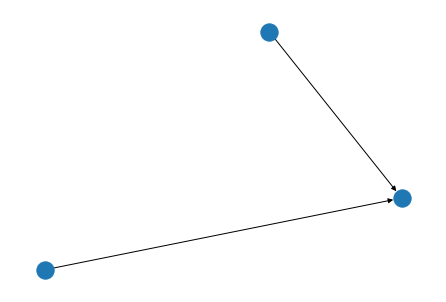

In [23]:
psylve_nx = nx.from_pandas_edgelist(psylve_pd, source='source', target='target', edge_attr=None, create_using=nx.DiGraph())
nx.draw(psylve_nx)

## Visualisation

In [24]:
from pyvis.network import Network

net = Network(notebook=True, directed =True)

#net.from_nx(psylve_nx)

for s,t,l in [(row[0],row[1],row[2]) for row in zip(psylve_pd['source'],psylve_pd['target'],psylve_pd['type'])]:
    net.add_node(s)
    net.add_node(t)
    net.add_edge(s,t,label=str(l))
net.show_buttons(filter_=["physics"])
net.show('PsylVe.html')